# MGOC15 -  Data Assignment 4 (7 Points)

MGOC15 - Introductory Business Data Analytics

**Topics Tested:** Data Cleaning, df.loc, Concatenation, Categorical Imputation, Outliers, and Correlations. <br>
**Submission Format**: When you submit your assignment, please mention your name and your partner's name (if you collaborated) in the .ipynb file.


### Florence AirBnB Bookings

The (government of) beautiful city of Florence in Italy is tired of how AirBnBs have taken over the city. However, they are also keenly aware of how tourism is their number one source of revenue. Trying to balance these two needs, the city wants to understand what factors motivate people to book AirBnBs.

To answer this question, you have procured two datasets "AirBnB_Centro.csv" and "AirBnB_Rest.csv, which contain a number of columns. Please familiarize yourself with each column before you proceed with the analysis. Note that the two files contain **almost** the same set of columns. However, the centro file has only listings in the historic Centro Storico neighbourhood, whereas the rest file has AirBnB listings from the rest of Florence (so no overlap in listings).

**We will use BookingsPerMonth** as the outcome variable, which denotes the average number of bookings a property has received in a given month (Since this denotes the total number of bookings divided by the time period, it is likely to be a fraction).

**CommissionsPerMonth** can also be viewed as an outcome variable.

<b> Note: </b> Before answering the questions, please go to to the Jupyter's menu and execute "Kernel", "Restart & Run all." This will ensure that the notebook and modules are appropriately loaded. Qualitative questions can be answered  either as comments or Jupyter markups in the appropriate cells.

<i> This assignment is worth 7 points</i>

### Loading Python modules

We start by first importing packages and modules needed for our analysis

In [229]:
import pandas as pd               # for data manipulation
import numpy as np                # for stats and numerical analysis
import matplotlib.pyplot as plt   # for plotting and data visualization

### Question 1: Combining Datasets [1 point]

**Part a**: As mentioned above, the AirBnB data has been provided in two datasets with the more popular Centro Storico (Historic Centre) listings in their own dataset **AirBnB_Centro.csv** and the remaining in **AirBnB_Rest.csv**. Correct this problem by joining the two datasets into a new dataframe called **df_airbnb**.

In [230]:
#Answer to Question 1 - Part a
df1=pd.read_csv("AirBnB_Centro.csv")
df2=pd.read_csv("AirBnB_Rest.csv")


In [231]:
df_airbnb=pd.concat([df1,df2])
df_airbnb.head()

,HostResponseTime,HostResponseRate,HostAcceptRate,Superhost,HostListings,Neighbourhood,Latitude,Longitude,RoomType,Accomodates,Bathrooms,Bedrooms,Beds,...,Availability365,ReviewCount,FirstReview,AvgRating,RatingAccuracy,RatingClean,RatingCheckIn,RatingCommunication,RatingLocation,RatingValue,Instant Booking,BookingsPerMonth,CommissionsPerMonth
0,within an hour,1.0,1.00,f,32,Centro Storico,43.77709,11.25216,Private room,2,1.0,1.0,1.0,...,301,119,2013.4,4.65,4.73,4.87,4.85,4.91,4.90,4.71,t,1.19,34.8075
1,within an hour,1.0,1.00,f,5,Centro Storico,43.76268,11.24149,Hotel room,2,1.0,1.0,1.0,...,352,512,2012.4,4.84,4.82,4.87,4.88,4.92,4.71,4.82,t,4.58,144.2700
2,within an hour,1.0,0.83,f,10,Centro Storico,43.77525,11.25258,Private room,2,0.0,1.0,2.0,...,290,49,2015.4,4.47,4.60,4.65,4.79,4.72,4.88,4.49,f,0.65,14.6250
3,within an hour,1.0,0.83,f,10,Centro Storico,43.77525,11.25258,Private room,2,1.0,1.0,2.0,...,309,15,2019.4,4.08,3.83,4.33,4.58,4.42,5.00,4.17,f,0.56,15.1200
4,within an hour,1.0,1.00,f,189,Centro Storico,43.76944,11.26331,Entire home/apt,2,1.0,1.0,1.0,...,11,2,2016.7,3.00,4.00,4.00,4.50,3.50,4.50,4.00,t,0.03,1.4445


In [232]:
#Answer to Question 1 - Part b
print(len(df2))
df_missing=df_airbnb[df_airbnb["Instant Booking"].isnull()]
print(len(df_missing))

1176
1176


**Findings for Part b** The value for Instant Booking in AirBnB_Rest.csv are missing in df_airbnb. Therefore, there are 1176 rows containing column that has missing (NaN) value for Instant Booking in df_airbnb.

<font color=red>All subsequent analyses must be on df_airbnb</font>

### Question 2: Modifying the DataFrame [1 point]

As a first step, we will make modifications to the dataframe to aid in our analysis later.

**Part a**: Some AirBnB hosts have marked their homes as having 1.5 bathrooms. Anyone who has hunted for an apartment/house in North America knows that this is standard practice for bathrooms that do not contain a shower. However, the Florence government has a different view on this. Any house in the touristy Centro Storico neighbourhood with 1.5 bathrooms only leads to more confusion and therefore, this has to be regulated. 

Correct this field discrepancy by rounding any listing **in the *Centro Storico* neighbourhood only** with 1.5 bathrooms up to 2.

In [233]:
#Answer 2a
df_airbnb["Bathrooms"].value_counts()

Bathrooms
1.0    3668
2.0     995
0.0     743
1.5     268
Name: count, dtype: int64

In [234]:
df_airbnb.loc[(df_airbnb['Neighbourhood'] == 'Centro Storico') & (df_airbnb['Bathrooms'] == 1.5),'Bathrooms'] = 2

In [235]:
df_airbnb["Bathrooms"].value_counts()

Bathrooms
1.0    3668
2.0    1213
0.0     743
1.5      50
Name: count, dtype: int64

**Part b**: As you may have noticed in the data, some houses have been quite generous in their accomodates column, going on to claim that the listing accomodates 10, 12, 13... and even 16 people. To keep the dataset realistic, please reduce the value in the *Accomodates* column by two for any listing that claims to accomodate twelve or more people.

    Hint: You can solve it in one line using the df.loc command and the -= column.

### Hint (-= operation)

There are many ways to solve the above problem. One thing that may help you is to know what the following line of code does. If you have any further questions, you can contact the instructor. 

In [236]:
#Sample code to illustrate the new concept +=
x=2
x+=2
print(x)

4


In [237]:
#continue sample code
y=3
y-=2
print(y)



1


In [238]:
#Answer 2b
df_airbnb["Accomodates"].value_counts()

Accomodates
4     1821
2     1522
6      698
3      609
5      425
8      171
1      144
7      131
10      40
9       39
12      25
16      24
11      11
14       7
15       5
13       2
Name: count, dtype: int64

In [239]:
df_airbnb.loc[df_airbnb["Accomodates"]>=12,"Accomodates"]-=2
df_airbnb["Accomodates"].value_counts()

Accomodates
4     1821
2     1522
6      698
3      609
5      425
8      171
1      144
7      131
10      65
9       39
14      24
11      13
12       7
13       5
Name: count, dtype: int64

### Question 3: Missing Entries: Categorical Imputation [2 points]

Unfortunately, the dataset is missing several entries over multiple columns, so we will carefully apply deletion in some parts, imputation in others, and simply ignore the rest. First of all, we can assume that all missing entries are due to an Excel error by the statistician handling the dataset, who is amazing with Python but not so much with Excel.

In particular, we will only deal with the missing values in the *Price* and *CommissionsPerMonth* columns. Others aren't as important, so they can be ignored.

**Part a**: Replace the missing values in the *Price* column using categorical imputation. In particular, identify the column that has the strongest correlation with *Price* (either positive and negative). As mentioned in class, divide the dataset into high and low based on this new identified column and then impute the missing Price values accordingly.

In [240]:
# Solution to 3a

pd.set_option('display.max_columns', 26)
df_airbnb.corr("kendall",numeric_only=True)

,HostResponseRate,HostAcceptRate,HostListings,Latitude,Longitude,Accomodates,Bathrooms,Bedrooms,Beds,Price,MinNights,Availability30,Availability60,Availability90,Availability365,ReviewCount,FirstReview,AvgRating,RatingAccuracy,RatingClean,RatingCheckIn,RatingCommunication,RatingLocation,RatingValue,BookingsPerMonth,CommissionsPerMonth
HostResponseRate,1.000000,0.191059,-0.146286,0.017645,-0.000042,-0.023448,0.040530,-0.023229,-0.013450,0.007817,0.062331,-0.024923,-0.036951,-0.043889,-0.040583,0.119545,-0.028645,0.126619,0.117791,0.112674,0.108435,0.138486,0.032698,0.125577,0.145382,0.144680
HostAcceptRate,0.191059,1.000000,-0.036408,0.000200,-0.020654,0.038547,0.058018,-0.011628,-0.010831,0.069264,-0.038247,-0.008270,-0.007123,-0.009413,-0.006330,0.060947,0.061268,0.057920,0.048850,0.073536,0.038966,0.060907,0.044723,0.058311,0.115539,0.137490
HostListings,-0.146286,-0.036408,1.000000,-0.055925,0.033747,0.114179,0.015755,0.076577,0.077328,0.191575,-0.082744,0.012704,0.013295,0.003239,-0.009354,-0.102441,-0.003264,-0.188534,-0.149409,-0.141079,-0.177709,-0.160139,0.060040,-0.176133,-0.144213,-0.062658
Latitude,0.017645,0.000200,-0.055925,1.000000,-0.030918,-0.051353,-0.034925,-0.046987,-0.019157,-0.104717,-0.044854,0.004354,0.004951,0.011675,-0.023821,-0.009441,0.022395,-0.014928,0.004823,0.006818,0.009316,0.004930,-0.169282,-0.017943,-0.000256,-0.046947
Longitude,-0.000042,-0.020654,0.033747,-0.030918,1.000000,0.004372,-0.016064,0.023881,0.011993,0.045402,0.046897,-0.003805,-0.008855,-0.019911,-0.011597,-0.018107,-0.010265,-0.005052,-0.003091,-0.014486,-0.001136,-0.011333,0.061201,0.001980,-0.022544,-0.005656
Accomodates,-0.023448,0.038547,0.114179,-0.051353,0.004372,1.000000,0.260011,0.662420,0.669288,0.419698,0.016064,-0.014791,-0.021351,-0.043691,-0.031271,-0.023505,0.002891,-0.000359,-0.010670,-0.016071,-0.038665,-0.023563,0.060962,0.010781,-0.041042,0.140136
Bathrooms,0.040530,0.058018,0.015755,-0.034925,-0.016064,0.260011,1.000000,0.237813,0.188716,0.223297,0.049807,-0.001675,-0.007310,-0.023857,-0.003214,-0.005609,-0.010100,0.013928,0.017322,0.005123,-0.004019,0.017526,0.056796,0.013950,-0.008214,0.064941
Bedrooms,-0.023229,-0.011628,0.076577,-0.046987,0.023881,0.662420,0.237813,1.000000,0.644990,0.397964,0.078993,0.003972,-0.002299,-0.030619,-0.028498,-0.041069,0.008243,-0.001868,-0.014948,-0.012238,-0.027167,-0.025528,0.055945,0.003776,-0.059452,0.126347
Beds,-0.013450,-0.010831,0.077328,-0.019157,0.011993,0.669288,0.188716,0.644990,1.000000,0.314995,0.024799,-0.005486,-0.012250,-0.035295,-0.038139,-0.042686,0.005953,-0.013794,-0.020671,-0.021813,-0.023658,-0.020532,0.035359,-0.003081,-0.062003,0.081659
Price,0.007817,0.069264,0.191575,-0.104717,0.045402,0.419698,0.223297,0.397964,0.314995,1.000000,0.020520,0.058233,0.045858,0.015324,0.022839,-0.073339,-0.010566,0.072935,0.055354,0.068015,0.008706,0.025440,0.199342,0.058254,-0.107779,0.182892


Given that accomondates have the strongest correlation with price which is 0.419698, i will use accomondates for calculation.

In [241]:
df_airbnb["Accomodates"].describe()

count    5674.000000
mean        3.970039
std         1.983757
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        14.000000
Name: Accomodates, dtype: float64

In [242]:
split=4.5
dfLow=df_airbnb[df_airbnb["Accomodates"]<=split]
dfHigh=df_airbnb[df_airbnb["Accomodates"]>split]

PriceLow=dfLow["Price"].mean()
PriceHigh=dfHigh["Price"].mean()

print(PriceLow, PriceHigh)

78.97399411187439 149.54996817313813


In [243]:
df_airbnb.loc[(df_airbnb["Price"].isnull())&(df_airbnb["Accomodates"]>split),"Price"]=PriceHigh
df_airbnb.loc[(df_airbnb["Price"].isnull())&(df_airbnb["Accomodates"]<=split),"Price"]=PriceLow 
df_airbnb["Price"].isnull().value_counts()

Price
False    5674
Name: count, dtype: int64

**Part b**: (Explanation only) Your manager wants you to divide the AirBnB listings into highly rated and poorly rated listings (e.g., to compare the average number of bookings according to ratings). They propose using a cutoff that is the 90-th percentile of the *AvgRating* column. However, thanks to your background in data analytics, you know that it is better to use a cutoff between the 50th and 75th percentile. Explain to your manager why this is the case. 

**Explanation for Part b**

When using 90-th perentile the data might end up including outliers with extreme circumstances (such as extremely high ratings paid by hosts), therefore, by using the middle to upper range of ratings, we can ensure a broader and more fair comparison.

**Part c**: Please handle the missing data in the *CommissionsPerMonth* column using either deletion or imputation with mean. Explain your choice.

    Note: There is no need to use categorical imputation for this problem.

In [244]:
#Solution to 3c
print(df_airbnb["CommissionsPerMonth"].isnull().value_counts())
a=2/(5672+2)
print(a)


CommissionsPerMonth
False    5672
True        2
Name: count, dtype: int64
0.00035248501938667606


1) the percentage of missing data in this column is very vew, which is smaller than 5%. 2) Given that the data missing are caused by Excel error, and this error is not related to the nature of the data itself but rather to the proficiency of the statistician, the data should not be biased. Therefore, we can simply use deletion.

In [245]:
drop_col=["CommissionsPerMonth"]
df_airbnb=df_airbnb.dropna(subset=drop_col)
print(df_airbnb["CommissionsPerMonth"].isnull().value_counts())

CommissionsPerMonth
False    5672
Name: count, dtype: int64


### Question 4: Outliers and Correlations [2 points]

**Part a**: One of our future goals is to understand how the booking rate depends on features such as Average Rating (*AvgRating*) and *Price*. Before we start studying correlations, however, we need to check whether these three fields (BookingsPerMonth/AvgRating/Price) have any outliers. If so, remove them before proceeding. 

Use both visualizations and statistics to answer the question. This question only requires you to remove the corresponding outliers in the three columns mentioned above.

Axes(0.125,0.11;0.775x0.77)


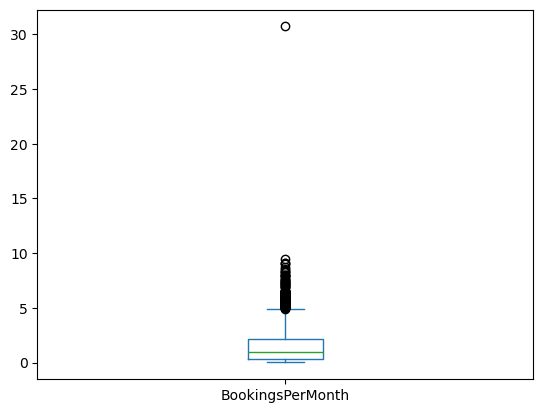

In [246]:
#Answer 4a
print(df_airbnb["BookingsPerMonth"].plot.box())


Axes(0.125,0.11;0.775x0.77)


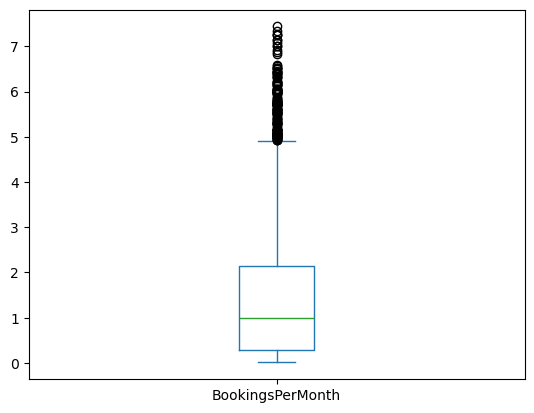

In [247]:
threshold1=df_airbnb['BookingsPerMonth'].mean() + 4*df_airbnb['BookingsPerMonth'].std()
df_airbnb=df_airbnb[df_airbnb['BookingsPerMonth']<threshold1]

print(df_airbnb["BookingsPerMonth"].plot.box())

Axes(0.125,0.11;0.775x0.77)


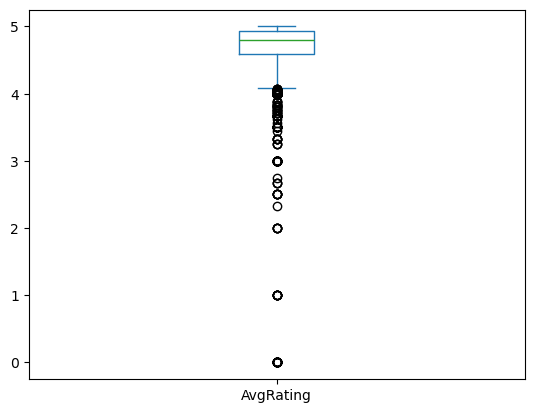

In [248]:
print(df_airbnb["AvgRating"].plot.box())

Axes(0.125,0.11;0.775x0.77)


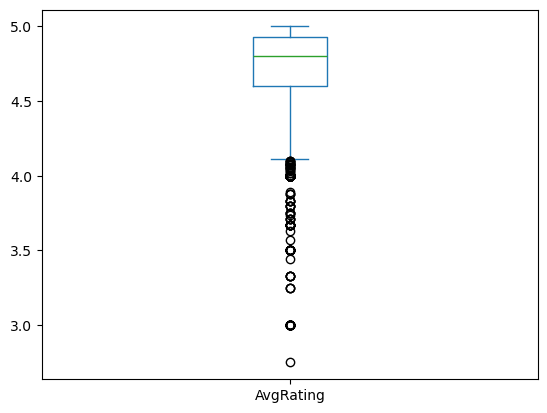

In [249]:
threshold2=df_airbnb['AvgRating'].mean() - 4*df_airbnb['AvgRating'].std()
df_airbnb=df_airbnb[df_airbnb['AvgRating']>threshold2]

print(df_airbnb["AvgRating"].plot.box())

Axes(0.125,0.11;0.775x0.77)


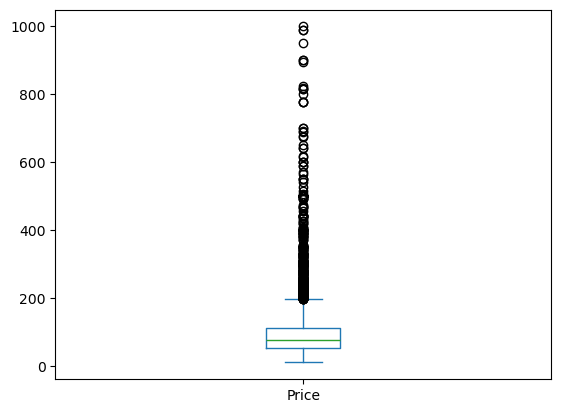

In [250]:
print(df_airbnb["Price"].plot.box())

Axes(0.125,0.11;0.775x0.77)


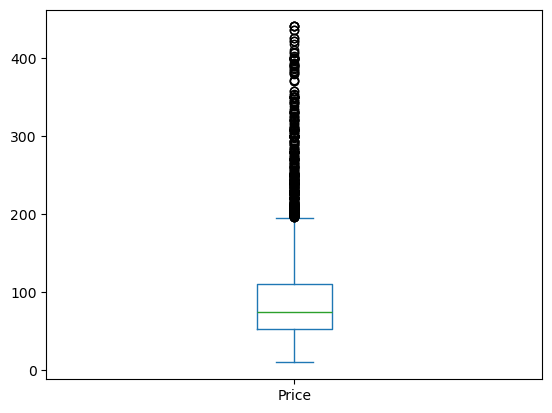

In [251]:
threshold3=df_airbnb['Price'].mean() + 4*df_airbnb['Price'].std()
df_airbnb=df_airbnb[df_airbnb['Price']<threshold3]

print(df_airbnb["Price"].plot.box())

**Part b**: "*Customers care more about price than the Average Rating when booking a listing on AirBnB*".

Verify this hypothesis using both visualizations and statistics. Based on the scatter plot, hypothesize why you think Average Rating may not play an important role in deciding the booking rate of an AirBnB.

<Axes: xlabel='Price', ylabel='BookingsPerMonth'>

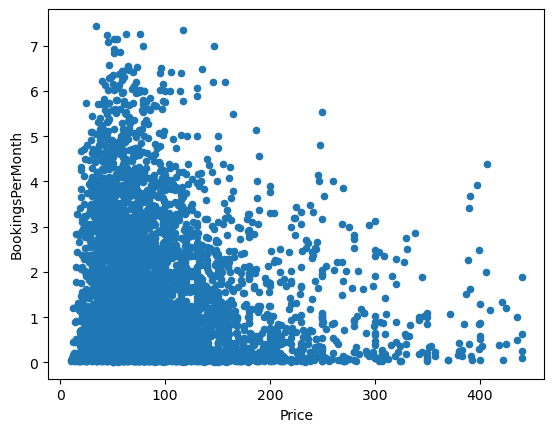

In [252]:
#Answer 4b
df_airbnb.plot.scatter(x='Price',y='BookingsPerMonth')


In [253]:
col_names =["Price","BookingsPerMonth"]
df_airbnb[col_names].corr("kendall")

,Price,BookingsPerMonth
Price,1.000000,-0.101903
BookingsPerMonth,-0.101903,1.000000


The scatter plot suggests that there is a negative correlation between price and booking per month, meaning that when the price increases, there are less booking per month. However, the correlation is not very strong as the graph does not present homoscedasticity, and the correlation is not close to 1.

<Axes: xlabel='AvgRating', ylabel='BookingsPerMonth'>

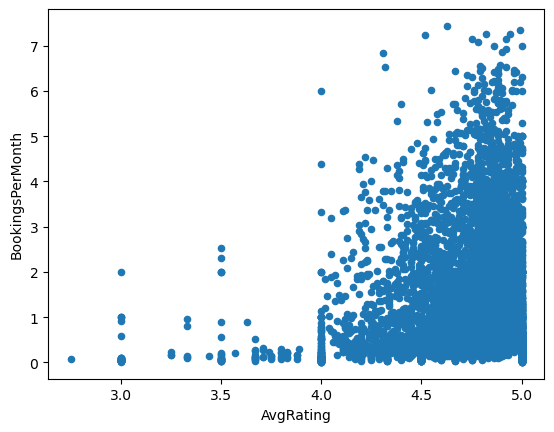

In [254]:
df_airbnb.plot.scatter(x='AvgRating',y='BookingsPerMonth')

In [255]:
col_names =["AvgRating","BookingsPerMonth"]
df_airbnb[col_names].corr("kendall")

,AvgRating,BookingsPerMonth
AvgRating,1.000000,0.010061
BookingsPerMonth,0.010061,1.000000


**Explanation**
The scatter plot suggests that there is a positive correlation between average rating and bookings per month. However, There isn't a trend indicating that higher-rated listings consistently have more bookings, instead, only extremely high/perfect rating listings have very high bookings. Therefore,compared to the consistent trend of correlation between price and bookings, Average Rating may not play an important role in deciding the booking rate. In addition, the stats also suggest the same conlcusion as the 0.01 is far from 1 compared to 0.1.

### Question 5: Data Discrepancies [1 point]

As you may be aware, AirBnB collects a commission of 15\% of each booking (in other words, if you pay \\$50 for each night and you stay for 2 nights, then AirBnB collects a commission of \$15 for this booking). In our dataframe, this is reflected in the **CommissionsPerMonth** column.

However, the government is concerned that AirBnB is underreporting these commissions. Use the data to validate or deny this hypothesis. In particular, our goal is to identify the total dollar amount that is being underreported, e.g., if the actual commissions is \\$1000 and AirBnB is only reporting \\$900, then the underreporting (which you need to find) is \\$100.

Here is some information that may help you solve this problem:

i) The bookings per month give you the number of customers who have booked a stay at the particular property.<br>
ii) You can assume that each customer stays for exactly 3 nights.<br>
iii) The price column gives you the price that the customer pays for a single night.<br>

i), ii), and iii) together with the 15\% commission should help you calculate the platform's actual commissions collected. You can compare this to the reported column **CommissionsPerMonth** column to calculate the underreporting.

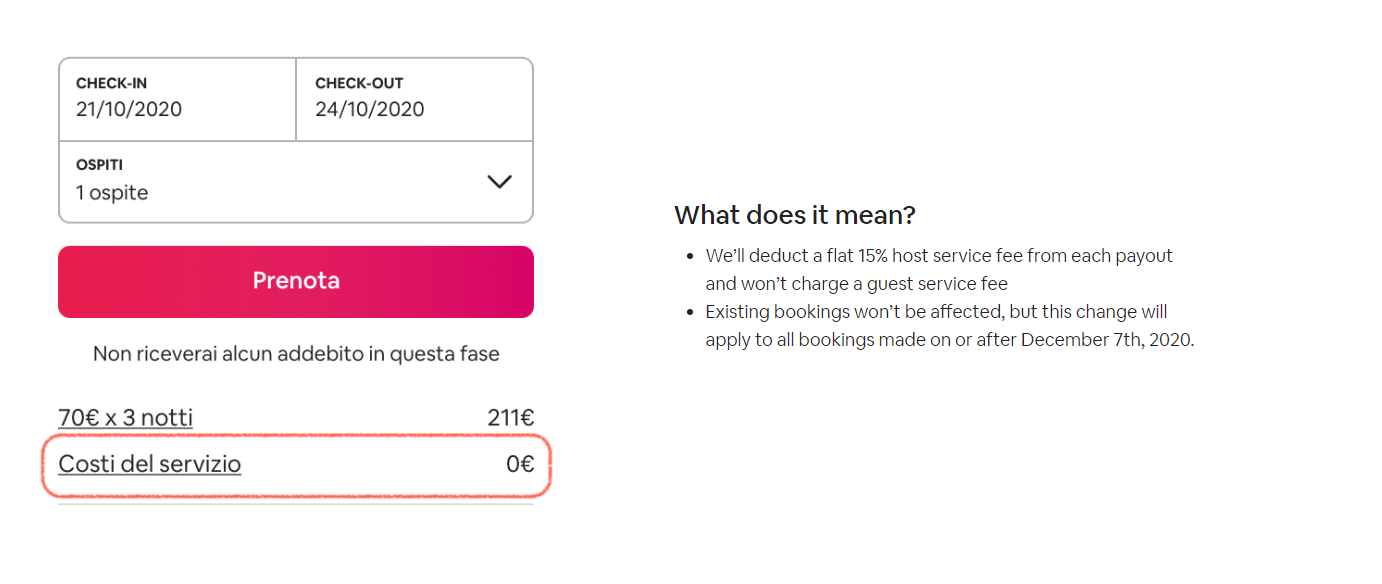

In [259]:
#Solution to Q5
df_airbnb["Total_Price_Payable"]=df_airbnb["BookingsPerMonth"] * df_airbnb["Price"] * 3 
df_airbnb["Estimated_Commision"]=df_airbnb["Total_Price_Payable"]*0.15
df_airbnb["Underreported_Commision"] = df_airbnb["Estimated_Commision"] - df_airbnb["CommissionsPerMonth"]
df_airbnb.head()

,HostResponseTime,HostResponseRate,HostAcceptRate,Superhost,HostListings,Neighbourhood,Latitude,Longitude,RoomType,Accomodates,Bathrooms,Bedrooms,Beds,...,RatingAccuracy,RatingClean,RatingCheckIn,RatingCommunication,RatingLocation,RatingValue,Instant Booking,BookingsPerMonth,CommissionsPerMonth,Total_Price_Payable,Estimate_Commision,Underreported_Commision,Estimated_Commision
0,within an hour,1.0,1.00,f,32,Centro Storico,43.77709,11.25216,Private room,2,1.0,1.0,1.0,...,4.73,4.87,4.85,4.91,4.90,4.71,t,1.19,34.8075,232.05,34.8075,0.000000e+00,34.8075
1,within an hour,1.0,1.00,f,5,Centro Storico,43.76268,11.24149,Hotel room,2,1.0,1.0,1.0,...,4.82,4.87,4.88,4.92,4.71,4.82,t,4.58,144.2700,961.80,144.2700,0.000000e+00,144.2700
2,within an hour,1.0,0.83,f,10,Centro Storico,43.77525,11.25258,Private room,2,0.0,1.0,2.0,...,4.60,4.65,4.79,4.72,4.88,4.49,f,0.65,14.6250,97.50,14.6250,0.000000e+00,14.6250
3,within an hour,1.0,0.83,f,10,Centro Storico,43.77525,11.25258,Private room,2,1.0,1.0,2.0,...,3.83,4.33,4.58,4.42,5.00,4.17,f,0.56,15.1200,100.80,15.1200,1.776357e-15,15.1200
4,within an hour,1.0,1.00,f,189,Centro Storico,43.76944,11.26331,Entire home/apt,2,1.0,1.0,1.0,...,4.00,4.00,4.50,3.50,4.50,4.00,t,0.03,1.4445,9.63,1.4445,0.000000e+00,1.4445


In [260]:
df_airbnb["Underreported_Commision"].sum()

1483.7174247508551